In [1]:
import os
import pickle as pkl
from collections import Counter
import yaml
from tqdm import tqdm
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
global CFG
with open("../../config.yaml", "r") as ymlfile:
    CFG = yaml.load(ymlfile, Loader=yaml.SafeLoader)
dat_dir = CFG["gpudatadir"]

In [9]:
# built on sister
with open(os.path.join(dat_dir, 'ppl_dist_in_bags.pkl'), 'rb') as f:
    dist_dict = pkl.load(f)
with open(os.path.join(dat_dir, 'lookup_cie.pkl'), 'rb') as f_name:
    cie_dict = pkl.load(f_name)
with open(os.path.join(dat_dir, 'lookup_clus.pkl'), 'rb') as f_name:
    clus_dict = pkl.load(f_name)
with open(os.path.join(dat_dir, 'lookup_dpt.pkl'), 'rb') as f_name:
    dpt_dict = pkl.load(f_name)

In [10]:
lookup_bag = {"cie": cie_dict,
             "clus": clus_dict,
             "dpt": dpt_dict}

In [4]:
total_cie = sum([i for i in dist_dict["cie"].values()])
total_clus = sum([i for i in dist_dict["clus"].values()])
total_dpt = sum([i for i in dist_dict['dpt'].values()])

In [12]:
def plot_hist_and_info(dist_dict, lookup_bag, handle):
    counts_bag = [i for i in dist_dict[handle].values()]
    # bags = [i for i in dist_dict[handle].keys()]
    plt.hist(counts_bag, density=True)
    print(stats.describe(counts_bag))
    most_rep = [(lookup_bag[handle][i], j) for (i, j) in dist_dict[handle].most_common(3)]
    print("Most represented classes: " + str(most_rep))

DescribeResult(nobs=207, minmax=(1, 5196), mean=867.3381642512078, variance=523361.4676140895, skewness=3.06773249837509, kurtosis=12.391066942059943)
Most represented classes: [('sncf', 5196), ('orange', 4962), ('edf', 3851)]


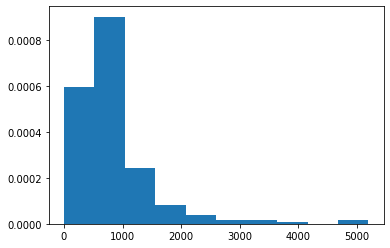

In [15]:
plot_hist_and_info(dist_dict, lookup_bag, "cie")

DescribeResult(nobs=30, minmax=(782, 13643), mean=5984.633333333333, variance=10769628.722988507, skewness=0.6686944102823141, kurtosis=-0.3070017972128265)
Most represented classes: [(4, 13643), (23, 12426), (29, 11858)]


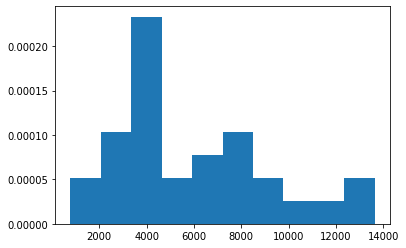

In [16]:
plot_hist_and_info(dist_dict, lookup_bag, "clus")

DescribeResult(nobs=5888, minmax=(1, 971), mean=30.492357336956523, variance=2779.3021328486775, skewness=5.216882016914969, kurtosis=42.813317983096354)
Most represented classes: [(('educationnationale', 14), 971), (('orange', 29), 598), (('sncf', 29), 572)]


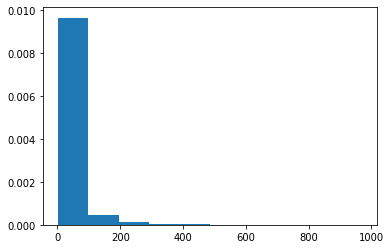

In [17]:
plot_hist_and_info(dist_dict, lookup_bag, "dpt")

In [18]:
for handle in ["cie", 'clus', "dpt"]:
    print(dist_dict[handle].most_common(1))

[(177, 5196)]
[(211, 13643)]
[(2356, 971)]
